In [1]:
# Libraries
library(ggplot2)
library(gplots)
library(reshape2)
library(ggpubr)


Attaching package: ‘gplots’


The following object is masked from ‘package:stats’:

    lowess




# Lolliplot and geoclone for cortex

In [23]:
filtered <- read.table("../20230101_QC/final_summary_anno3.txt",header=T,sep="\t")
mosaic_filtered <- filtered[filtered$Mosaic_shared_btw_WGS_Amp==1,]

In [24]:
melt_mtcars<-mosaic_filtered[,c("ID", "MAF", "CHROM.POS.REF.ALT","Cell_Type","Organ",'Region','Punch','Hemisphere')]
melt_mtcars$MAF <- sqrt(melt_mtcars$MAF)
casted_MAF_VarBySample <- dcast(melt_mtcars, CHROM.POS.REF.ALT~ID, value.var = "MAF" , na.rm=T)
rownames(casted_MAF_VarBySample) <- casted_MAF_VarBySample$CHROM.POS.REF.ALT
casted_MAF_VarBySample2 <- casted_MAF_VarBySample[ , !(names(casted_MAF_VarBySample) %in% c("CHROM.POS.REF.ALT"))]

In [25]:
colnames(casted_MAF_VarBySample2)[colnames(casted_MAF_VarBySample2) == "7669_R_EC_DLX1"] <- "7669_L_EC_DLX1_1"
colnames(casted_MAF_VarBySample2)[colnames(casted_MAF_VarBySample2) == "7669_R_EC_TBR1"] <- "7669_L_EC_TBR1_1"  
colnames(casted_MAF_VarBySample2)[colnames(casted_MAF_VarBySample2) == "7669_R_EC_COUPTF2"] <- "7669_L_EC_COUPTF2_1"  

colnames(casted_MAF_VarBySample2)[colnames(casted_MAF_VarBySample2) == "7669_L_EC_DLX1"] <- "7669_R_EC_DLX1"
#colnames(casted_MAF_VarBySample2)[colnames(casted_MAF_VarBySample2) == "7669_L_EC_TBR1"] <- "7669_R_EC_TBR1"
colnames(casted_MAF_VarBySample2)[colnames(casted_MAF_VarBySample2) == "7669_L_EC_COUPTF2"] <- "7669_R_EC_COUPTF2"

colnames(casted_MAF_VarBySample2)[colnames(casted_MAF_VarBySample2) == "7669_L_EC_DLX1_1"] <- "7669_L_EC_DLX1"
colnames(casted_MAF_VarBySample2)[colnames(casted_MAF_VarBySample2) == "7669_L_EC_TBR1_1"] <- "7669_L_EC_TBR1"  
colnames(casted_MAF_VarBySample2)[colnames(casted_MAF_VarBySample2) == "7669_L_EC_COUPTF2_1"] <- "7669_L_EC_COUPTF2"  

In [26]:
data <- data.frame()
for(x in 1:nrow(casted_MAF_VarBySample2)){
    #----------------------------Left hem-----------------------------------
    data['7669_L_F_1_DLX1',x]<-casted_MAF_VarBySample2[x,]$'7669_L_F_1_DLX1'
    data['7669_L_F_1_TBR1',x]<-casted_MAF_VarBySample2[x,]$'7669_L_F_1_TBR1'
    data['7669_L_F_1_COUPTF2',x]<-casted_MAF_VarBySample2[x,]$'7669_L_F_1_COUPTF2'
    
    data['7669_L_P_1_DLX1',x]<-casted_MAF_VarBySample2[x,]$'7669_L_P_1_DLX1'
    data['7669_L_P_1_TBR1',x]<-casted_MAF_VarBySample2[x,]$'7669_L_P_1_TBR1'
    data['7669_L_P_1_COUPTF2',x]<-casted_MAF_VarBySample2[x,]$'7669_L_P_1_COUPTF2'
    
    data['7669_L_I_1_DLX1',x]<-casted_MAF_VarBySample2[x,]$'7669_L_I_1_DLX1'
    data['7669_L_I_1_TBR1',x]<-casted_MAF_VarBySample2[x,]$'7669_L_I_1_TBR1'
    data['7669_L_I_1_COUPTF2',x]<-casted_MAF_VarBySample2[x,]$'7669_L_I_1_COUPTF2'
    
    data['7669_L_O_1_DLX1',x]<-casted_MAF_VarBySample2[x,]$'7669_L_O_1_DLX1'
    data['7669_L_O_1_TBR1',x]<-casted_MAF_VarBySample2[x,]$'7669_L_O_1_TBR1'
    data['7669_L_O_1_COUPTF2',x]<-casted_MAF_VarBySample2[x,]$'7669_L_O_1_COUPTF2'
    
    data['7669_L_T_1_DLX1',x]<-casted_MAF_VarBySample2[x,]$'7669_L_T_1_DLX1'
    data['7669_L_T_1_TBR1',x]<-casted_MAF_VarBySample2[x,]$'7669_L_T_1_TBR1'
    data['7669_L_T_1_COUPTF2',x]<-casted_MAF_VarBySample2[x,]$'7669_L_T_1_COUPTF2'
    
    data['7669_L_mO_DLX1',x]<-casted_MAF_VarBySample2[x,]$'7669_L_mO_DLX1'
    data['7669_L_mO_COUPTF2',x]<-casted_MAF_VarBySample2[x,]$'7669_L_mO_COUPTF2'
    
    data['7669_L_EC_DLX1',x]<-casted_MAF_VarBySample2[x,]$'7669_L_EC_DLX1'
    data['7669_L_EC_TBR1',x]<-casted_MAF_VarBySample2[x,]$'7669_L_EC_TBR1'
    data['7669_L_EC_COUPTF2',x]<-casted_MAF_VarBySample2[x,]$'7669_L_EC_COUPTF2'
    
    data['7669_L_CC_2_DLX1',x]<-casted_MAF_VarBySample2[x,]$'7669_L_CC_2_DLX1'
    data['7669_L_CC_2_COUPTF2',x]<-casted_MAF_VarBySample2[x,]$'7669_L_CC_2_COUPTF2'
    
    #----------------------------Right hem-----------------------------------
    data['7669_R_F_1_DLX1',x]<-casted_MAF_VarBySample2[x,]$'7669_R_F_1_DLX1'
    data['7669_R_F_1_TBR1',x]<-casted_MAF_VarBySample2[x,]$'7669_R_F_1_TBR1'
    data['7669_R_F_1_COUPTF2',x]<-casted_MAF_VarBySample2[x,]$'7669_R_F_1_COUPTF2'
    
    data['7669_R_P_1_DLX1',x]<-casted_MAF_VarBySample2[x,]$'7669_R_P_1_DLX1'
    data['7669_R_P_1_TBR1',x]<-casted_MAF_VarBySample2[x,]$'7669_R_P_1_TBR1'
    data['7669_R_P_1_COUPTF2',x]<-casted_MAF_VarBySample2[x,]$'7669_R_P_1_COUPTF2'
    
    data['7669_R_I_1_DLX1',x]<-casted_MAF_VarBySample2[x,]$'7669_R_I_1_DLX1'
    data['7669_R_I_1_TBR1',x]<-casted_MAF_VarBySample2[x,]$'7669_R_I_1_TBR1'
    data['7669_R_I_1_COUPTF2',x]<-casted_MAF_VarBySample2[x,]$'7669_R_I_1_COUPTF2'
    
    data['7669_R_O_1_DLX1',x]<-casted_MAF_VarBySample2[x,]$'7669_R_O_1_DLX1'
    data['7669_R_O_1_TBR1',x]<-casted_MAF_VarBySample2[x,]$'7669_R_O_1_TBR1'
    data['7669_R_O_1_COUPTF2',x]<-casted_MAF_VarBySample2[x,]$'7669_R_O_1_COUPTF2'
    
    data['7669_R_T_1_DLX1',x]<-casted_MAF_VarBySample2[x,]$'7669_R_T_1_DLX1'
    data['7669_R_T_1_TBR1',x]<-casted_MAF_VarBySample2[x,]$'7669_R_T_1_TBR1'
    data['7669_R_T_1_COUPTF2',x]<-casted_MAF_VarBySample2[x,]$'7669_R_T_1_COUPTF2'
    
    data['7669_R_mO_DLX1',x]<-casted_MAF_VarBySample2[x,]$'7669_R_mO_DLX1'
    data['7669_R_mO_TBR1',x]<-casted_MAF_VarBySample2[x,]$'7669_R_mO_TBR1'
    data['7669_R_mO_COUPTF2',x]<-casted_MAF_VarBySample2[x,]$'7669_R_mO_COUPTF2'
    
    data['7669_R_EC_DLX1',x]<-casted_MAF_VarBySample2[x,]$'7669_R_EC_DLX1'
    data['7669_R_EC_COUPTF2',x]<-casted_MAF_VarBySample2[x,]$'7669_R_EC_COUPTF2'
    
    data['7669_R_CCMid_DLX1',x]<-casted_MAF_VarBySample2[x,]$'7669_R_CCMid_DLX1'
    data['7669_R_CC_Mid_TBR1',x]<-casted_MAF_VarBySample2[x,]$'7669_R_CC_Mid_TBR1'
    data['7669_R_CCMid_COUPTF2',x]<-casted_MAF_VarBySample2[x,]$'7669_R_CCMid_COUPTF2'
       
}

In [27]:
data[,'sample']<-rownames(data)

In [28]:
data[,'sample']<-as.character(data[,'sample'])

In [29]:
rownames(data)

[1] "7669_L_F_1_DLX1"      "7669_L_F_1_TBR1"      "7669_L_F_1_COUPTF2"  
 [4] "7669_L_P_1_DLX1"      "7669_L_P_1_TBR1"      "7669_L_P_1_COUPTF2"  
 [7] "7669_L_I_1_DLX1"      "7669_L_I_1_TBR1"      "7669_L_I_1_COUPTF2"  
[10] "7669_L_O_1_DLX1"      "7669_L_O_1_TBR1"      "7669_L_O_1_COUPTF2"  
[13] "7669_L_T_1_DLX1"      "7669_L_T_1_TBR1"      "7669_L_T_1_COUPTF2"  
[16] "7669_L_mO_DLX1"       "7669_L_mO_COUPTF2"    "7669_L_EC_DLX1"      
[19] "7669_L_EC_TBR1"       "7669_L_EC_COUPTF2"    "7669_L_CC_2_DLX1"    
[22] "7669_L_CC_2_COUPTF2"  "7669_R_F_1_DLX1"      "7669_R_F_1_TBR1"     
[25] "7669_R_F_1_COUPTF2"   "7669_R_P_1_DLX1"      "7669_R_P_1_TBR1"     
[28] "7669_R_P_1_COUPTF2"   "7669_R_I_1_DLX1"      "7669_R_I_1_TBR1"     
[31] "7669_R_I_1_COUPTF2"   "7669_R_O_1_DLX1"      "7669_R_O_1_TBR1"     
[34] "7669_R_O_1_COUPTF2"   "7669_R_T_1_DLX1"      "7669_R_T_1_TBR1"     
[37] "7669_R_T_1_COUPTF2"   "7669_R_mO_DLX1"       "7669_R_mO_TBR1"      
[40] "7669_R_mO_COUPTF2"    "7669_R_EC_DLX1"       "7669_R_EC_COUPTF2"   
[43] "7669_R_CCMid_DLX1"    "7669_R_CC_Mid_TBR1"   "7669_R_CCMid_COUPTF2"

In [30]:
xxx<-factor(rownames(data), level=rownames(data))

In [31]:
Color<-c("#F06666","#7BBE42","#5FBEEB", #L-F
        "#F06666","#7BBE42","#5FBEEB", # L-P
        "#F06666","#7BBE42","#5FBEEB", #L-I
        "#F06666","#7BBE42","#5FBEEB", #L-O
        "#F06666","#7BBE42","#5FBEEB", #L-T
        "#F06666","#5FBEEB", #L-mO
        "#F06666","#7BBE42","#5FBEEB", #L-EC
        "#F06666","#5FBEEB", #L-CC
        "#F06666","#7BBE42","#5FBEEB", #R-F
        "#F06666","#7BBE42","#5FBEEB",
        "#F06666","#7BBE42","#5FBEEB",
        "#F06666","#7BBE42","#5FBEEB",
        "#F06666","#7BBE42","#5FBEEB",
        "#F06666","#7BBE42","#5FBEEB",
        "#F06666","#5FBEEB",
        "#F06666","#7BBE42","#5FBEEB")

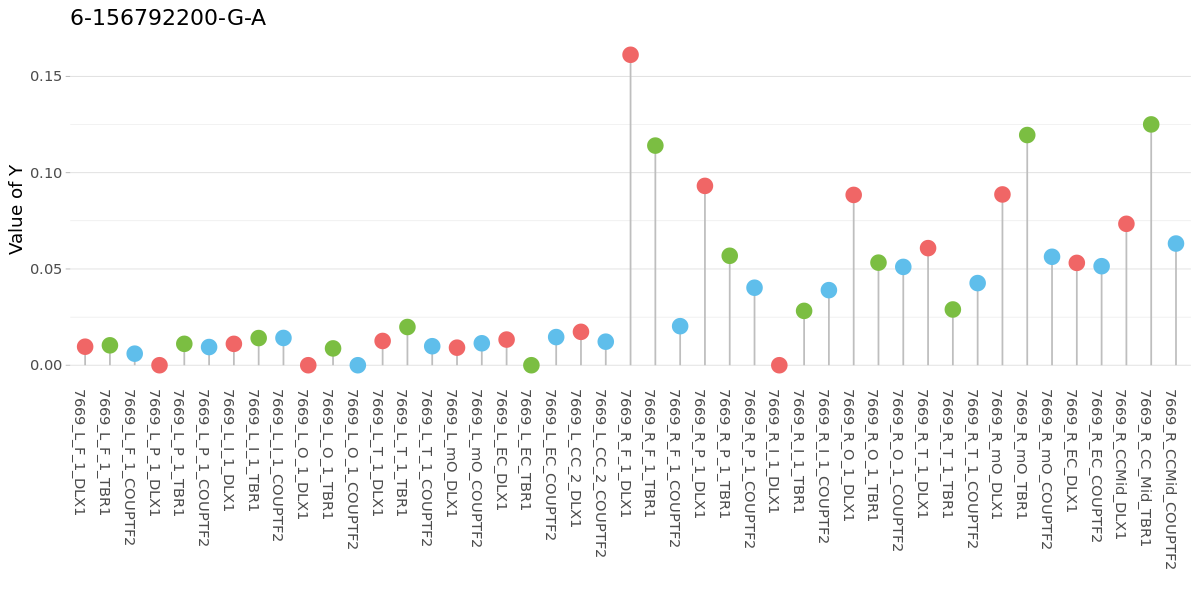

In [37]:
options(repr.plot.width=10, repr.plot.height=5)
x<-592
plot<-ggplot(data, aes(x=xxx, y=data[,x])) +
      geom_segment(aes(x=xxx, xend=xxx, y=0, yend=data[,x]), color="grey") +
      geom_point(color=Color, size=4) +
      theme_light() +
      theme(
        panel.grid.major.x = element_blank(),
        panel.border = element_blank(),
        axis.ticks.x = element_blank(),
        axis.text.x=element_text(angle = -90, hjust = 0)
      ) +
      xlab("") +
      ylab("Value of Y")+labs(title=rownames(casted_MAF_VarBySample2)[x],x="")
print(plot)

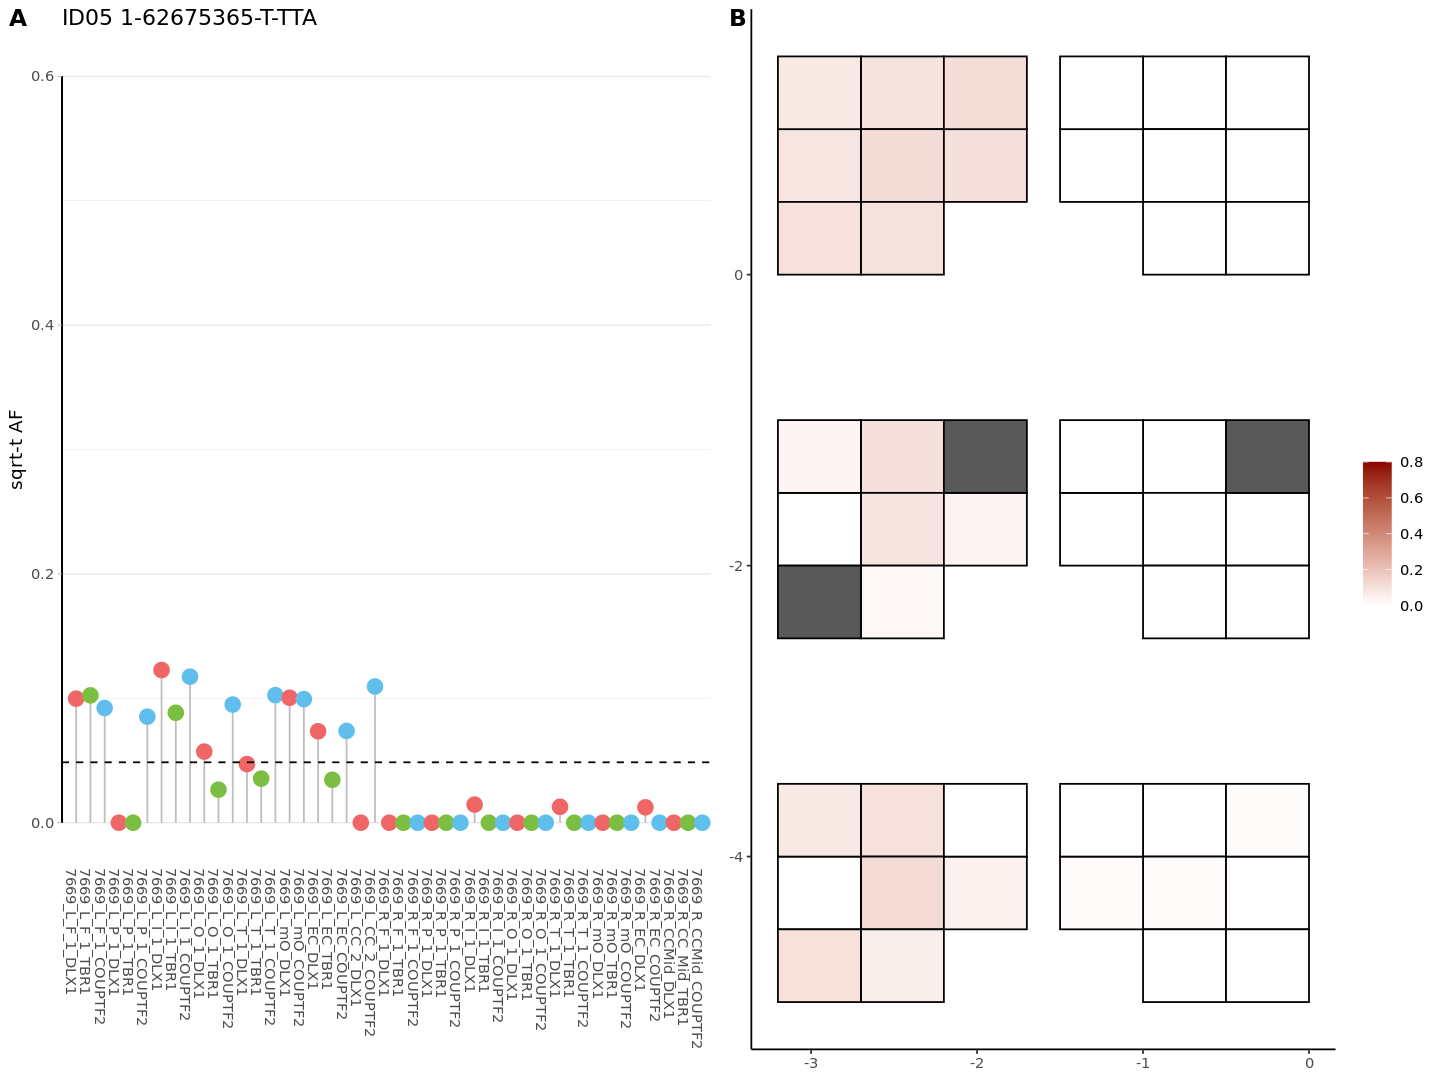

In [69]:
a<-0
b<-0
c<-0
d<- -2.5
e<- 0
f <- 2.5
x<-37

options(repr.plot.width=12, repr.plot.height=9)
bks=c(0,0.00236,0.005,0.1,0.20,0.3,0.4,0.456,0.5,0.6,1)
plot<-ggplot(data, aes(x=xxx, y=(data[,x]))) +
      geom_segment( aes(x=xxx, xend=xxx, y=0, yend=(data[,x])), color="grey") +
      geom_point( color=Color, size=4) +
      theme_light() +
      theme(
        panel.grid.major.x = element_blank(),
        panel.border = element_blank(),
        axis.ticks.x = element_blank(),
        axis.text.x=element_text(angle = -90, hjust = 0)
      ) + # scale_y_continuous(breaks=(bks),labels=bks)+
      xlab("") + geom_hline(yintercept=sqrt(0.00236),linetype=2,col="black") +
      ylab("sqrt-t AF")+labs(title=paste0("ID05 ",rownames(casted_MAF_VarBySample2)[x],x="")) +
      geom_segment(aes(x = 0, y = 0, xend = 0, yend = 0.6),color="black")

plot2 <-ggplot() + 

# ---------------------------------- DLX1 -------------------------------------    
geom_rect(aes(xmin = a-2.7, xmax = a-2.2, ymin = d-1.5, ymax = d-1, fill=(casted_MAF_VarBySample2[x,]$'7669_L_F_1_DLX1')),color='black')+  
geom_rect(aes(xmin = a-2.7, xmax = a-2.2, ymin = d-2, ymax = d-1.5, fill=(casted_MAF_VarBySample2[x,]$'7669_L_I_1_DLX1')),color='black')+ 
geom_rect(aes(xmin = a-2.7, xmax = a-2.2, ymin = d-2.5, ymax = d-2, fill=(casted_MAF_VarBySample2[x,]$'7669_L_O_1_DLX1')),color='black')+ 
geom_rect(aes(xmin = a-2.2, xmax = a-1.7, ymin = d-2, ymax = d-1.5, fill=(casted_MAF_VarBySample2[x,]$'7669_L_T_1_DLX1')),color='black')+ 
geom_rect(aes(xmin = a-3.2, xmax = a-2.7, ymin = d-2, ymax = d-1.5, fill=(casted_MAF_VarBySample2[x,]$'7669_L_P_1_DLX1')),color='black')+
geom_rect(aes(xmin = a-3.2, xmax = a-2.7, ymin = d-2.5, ymax = d-2, fill=(casted_MAF_VarBySample2[x,]$'7669_L_mO_DLX1')),color='black')+
geom_rect(aes(xmin = a-3.2, xmax = a-2.7, ymin = d-1.5, ymax = d-1, fill=(casted_MAF_VarBySample2[x,]$'7669_L_EC_DLX1')),color='black')+
geom_rect(aes(xmin = a-2.2, xmax = a-1.7, ymin = d-1.5, ymax = d-1, fill=(casted_MAF_VarBySample2[x,]$'7669_L_CC_2_DLX1')),color='black')+

geom_rect(aes(xmin = a-1, xmax = a-0.5, ymin = d-1.5, ymax = d-1, fill=(casted_MAF_VarBySample2[x,]$'7669_R_F_1_DLX1')),color='black')+  
geom_rect(aes(xmin = a-1, xmax = a-0.5, ymin = d-2, ymax = d-1.5, fill=(casted_MAF_VarBySample2[x,]$'7669_R_I_1_DLX1')),color='black')+  
geom_rect(aes(xmin = a-1, xmax = a-0.5, ymin = d-2.5, ymax = d-2, fill=(casted_MAF_VarBySample2[x,]$'7669_R_O_1_DLX1')),color='black')+  
geom_rect(aes(xmin = a-1.5, xmax = a-1, ymin = d-2, ymax = d-1.5, fill=(casted_MAF_VarBySample2[x,]$'7669_R_T_1_DLX1')),color='black')+  
geom_rect(aes(xmin = a-0.5, xmax = a, ymin = d-2, ymax = d-1.5, fill=(casted_MAF_VarBySample2[x,]$'7669_R_P_1_DLX1')),color='black')+ 
geom_rect(aes(xmin = a-0.5, xmax = a, ymin = d-2.5, ymax = d-2, fill=(casted_MAF_VarBySample2[x,]$'7669_R_mO_DLX1')),color='black')+ 
geom_rect(aes(xmin = a-0.5, xmax = a, ymin = d-1.5, ymax = d-1, fill=(casted_MAF_VarBySample2[x,]$'7669_R_EC_DLX1')),color='black')+ 
geom_rect(aes(xmin = a-1.5, xmax = a-1, ymin = d-1, ymax = d-1.5, fill=(casted_MAF_VarBySample2[x,]$'7669_R_CCMid_DLX1')),color='black')+ 

# # ---------------------------------- TBR1 -------------------------------------
geom_rect(aes(xmin = b-2.7, xmax = b-2.2, ymin = e-1.5, ymax = e-1, fill=(casted_MAF_VarBySample2[x,]$'7669_L_F_1_TBR1')),color='black')+  
geom_rect(aes(xmin = b-2.7, xmax = b-2.2, ymin = e-2, ymax = e-1.5, fill=(casted_MAF_VarBySample2[x,]$'7669_L_I_1_TBR1')),color='black')+ 
geom_rect(aes(xmin = b-2.7, xmax = b-2.2, ymin = e-2.5, ymax = e-2, fill=(casted_MAF_VarBySample2[x,]$'7669_L_O_1_TBR1')),color='black')+ 
geom_rect(aes(xmin = b-2.2, xmax = b-1.7, ymin = e-2, ymax = e-1.5, fill=(casted_MAF_VarBySample2[x,]$'7669_L_T_1_TBR1')),color='black')+ 
geom_rect(aes(xmin = b-3.2, xmax = b-2.7, ymin = e-2, ymax = e-1.5, fill=(casted_MAF_VarBySample2[x,]$'7669_L_P_1_TBR1')),color='black')+
geom_rect(aes(xmin = b-3.2, xmax = b-2.7, ymin = e-2.5, ymax = e-2, fill=casted_MAF_VarBySample2[x,]$''),color='black')+
geom_rect(aes(xmin = b-3.2, xmax = b-2.7, ymin = e-1.5, ymax = e-1, fill=(casted_MAF_VarBySample2[x,]$'7669_L_EC_TBR1')),color='black')+
geom_rect(aes(xmin = b-2.2, xmax = b-1.7, ymin = e-1.5, ymax = e-1, fill=casted_MAF_VarBySample2[x,]$''),color='black')+

geom_rect(aes(xmin = b-1, xmax = b-0.5, ymin = e-1.5, ymax = e-1, fill=(casted_MAF_VarBySample2[x,]$'7669_R_F_1_TBR1')),color='black')+  
geom_rect(aes(xmin = b-1, xmax = b-0.5, ymin = e-2, ymax = e-1.5, fill=(casted_MAF_VarBySample2[x,]$'7669_R_I_1_TBR1')),color='black')+  
geom_rect(aes(xmin = b-1, xmax = b-0.5, ymin = e-2.5, ymax = e-2, fill=(casted_MAF_VarBySample2[x,]$'7669_R_O_1_TBR1')),color='black')+  
geom_rect(aes(xmin = b-1.5, xmax = b-1, ymin = e-2, ymax = e-1.5, fill=(casted_MAF_VarBySample2[x,]$'7669_R_T_1_TBR1')),color='black')+  
geom_rect(aes(xmin = b-0.5, xmax = b, ymin = e-2, ymax = e-1.5, fill=(casted_MAF_VarBySample2[x,]$'7669_R_P_1_TBR1')),color='black')+ 
geom_rect(aes(xmin = b-0.5, xmax = b, ymin = e-2.5, ymax = e-2, fill=(casted_MAF_VarBySample2[x,]$'7669_R_mO_TBR1')),color='black')+ 
geom_rect(aes(xmin = b-0.5, xmax = b, ymin = e-1.5, ymax = e-1, fill=casted_MAF_VarBySample2[x,]$''),color='black')+ 
geom_rect(aes(xmin = b-1.5, xmax = b-1, ymin = e-1, ymax = e-1.5, fill=(casted_MAF_VarBySample2[x,]$'7669_R_CC_Mid_TBR1')),color='black')+

# ---------------------------------- DLX1 -------------------------------------
geom_rect(aes(xmin = c-2.7, xmax = c-2.2, ymin = f-1.5, ymax = f-1, fill=(casted_MAF_VarBySample2[x,]$'7669_L_F_1_COUPTF2')),color='black')+  
geom_rect(aes(xmin = c-2.7, xmax = c-2.2, ymin = f-2, ymax = f-1.5, fill=(casted_MAF_VarBySample2[x,]$'7669_L_I_1_COUPTF2')),color='black')+ 
geom_rect(aes(xmin = c-2.7, xmax = c-2.2, ymin = f-2.5, ymax = f-2, fill=(casted_MAF_VarBySample2[x,]$'7669_L_O_1_COUPTF2')),color='black')+ 
geom_rect(aes(xmin = c-2.2, xmax = c-1.7, ymin = f-2, ymax = f-1.5, fill=(casted_MAF_VarBySample2[x,]$'7669_L_T_1_COUPTF2')),color='black')+ 
geom_rect(aes(xmin = c-3.2, xmax = c-2.7, ymin = f-2, ymax = f-1.5, fill=(casted_MAF_VarBySample2[x,]$'7669_L_P_1_COUPTF2')),color='black')+
geom_rect(aes(xmin = c-3.2, xmax = c-2.7, ymin = f-2.5, ymax = f-2, fill=(casted_MAF_VarBySample2[x,]$'7669_L_mO_COUPTF2')),color='black')+
geom_rect(aes(xmin = c-3.2, xmax = c-2.7, ymin = f-1.5, ymax = f-1, fill=(casted_MAF_VarBySample2[x,]$'7669_L_EC_COUPTF2')),color='black')+
geom_rect(aes(xmin = c-2.2, xmax = c-1.7, ymin = f-1.5, ymax = f-1, fill=(casted_MAF_VarBySample2[x,]$'7669_L_CC_2_COUPTF2')),color='black')+

geom_rect(aes(xmin = c-1, xmax = c-0.5, ymin = f-1.5, ymax = f-1, fill=(casted_MAF_VarBySample2[x,]$'7669_R_F_1_COUPTF2')),color='black')+  
geom_rect(aes(xmin = c-1, xmax = c-0.5, ymin = f-2, ymax = f-1.5, fill=(casted_MAF_VarBySample2[x,]$'7669_R_I_1_COUPTF2')),color='black')+  
geom_rect(aes(xmin = c-1, xmax = c-0.5, ymin = f-2.5, ymax = f-2, fill=(casted_MAF_VarBySample2[x,]$'7669_R_O_1_COUPTF2')),color='black')+  
geom_rect(aes(xmin = c-1.5, xmax = c-1, ymin = f-2, ymax = f-1.5, fill=(casted_MAF_VarBySample2[x,]$'7669_R_T_1_COUPTF2')),color='black')+  
geom_rect(aes(xmin = c-0.5, xmax = c, ymin = f-2, ymax = f-1.5, fill=(casted_MAF_VarBySample2[x,]$'7669_R_P_1_COUPTF2')),color='black')+ 
geom_rect(aes(xmin = c-0.5, xmax = c, ymin = f-2.5, ymax = f-2, fill=(casted_MAF_VarBySample2[x,]$'7669_R_mO_COUPTF2')),color='black')+ 
geom_rect(aes(xmin = c-0.5, xmax = c, ymin = f-1.5, ymax = f-1, fill=(casted_MAF_VarBySample2[x,]$'7669_R_EC_COUPTF2')),color='black')+ 
geom_rect(aes(xmin = c-1.5, xmax = c-1, ymin = f-1, ymax = f-1.5, fill=(casted_MAF_VarBySample2[x,]$'7669_R_CCMid_COUPTF2')),color='black')+
#labs(title=rownames(casted_MAF_VarBySample2)[x],x="")+
#scale_fill_continuous(limits = c(0, 0.5))
scale_fill_gradient(low = "white", high = "red4", limits=c(0,0.8))+theme_classic()+theme(legend.title=element_blank())
figure <- ggarrange(plot,plot2, 
                    labels = c("A", "B"),
                    ncol = 2, nrow = 1)
print(figure)

In [70]:
a<-0
b<-0
c<-0
d<--2.5
e<- 0
f <- 2.5
pdf(file="7669_lolliplotNGeoclone_CTX.pdf",width=12,height=9)
bks=c(0,0.00236,0.005,0.1,0.20,0.3,0.4,0.456,0.5,0.6,1)

for(x in 1:nrow(casted_MAF_VarBySample2
   )){

plot<-ggplot(data, aes(x=xxx, y=(data[,x]))) +
      geom_segment( aes(x=xxx, xend=xxx, y=0, yend=(data[,x])), color="grey") +
      geom_point( color=Color, size=4) +
      theme_light() +
      theme(
        panel.grid.major.x = element_blank(),
        panel.border = element_blank(),
        axis.ticks.x = element_blank(),
        axis.text.x=element_text(angle = -90, hjust = 0)
      ) + # scale_y_continuous(breaks=(bks),labels=bks)+
      xlab("") + geom_hline(yintercept=sqrt(0.00236),linetype=2,col="black") +
      ylab("sqrt-t AF")+labs(title=paste0("ID05 ",rownames(casted_MAF_VarBySample2)[x],x="")) +
      geom_segment(aes(x = 0, y = 0, xend = 0, yend = 0.6),color="black")

plot2 <-ggplot() + 

# ---------------------------------- DLX1 -------------------------------------    
geom_rect(aes(xmin = a-2.7, xmax = a-2.2, ymin = d-1.5, ymax = d-1, fill=(casted_MAF_VarBySample2[x,]$'7669_L_F_1_DLX1')),color='black')+  
geom_rect(aes(xmin = a-2.7, xmax = a-2.2, ymin = d-2, ymax = d-1.5, fill=(casted_MAF_VarBySample2[x,]$'7669_L_I_1_DLX1')),color='black')+ 
geom_rect(aes(xmin = a-2.7, xmax = a-2.2, ymin = d-2.5, ymax = d-2, fill=(casted_MAF_VarBySample2[x,]$'7669_L_O_1_DLX1')),color='black')+ 
geom_rect(aes(xmin = a-2.2, xmax = a-1.7, ymin = d-2, ymax = d-1.5, fill=(casted_MAF_VarBySample2[x,]$'7669_L_T_1_DLX1')),color='black')+ 
geom_rect(aes(xmin = a-3.2, xmax = a-2.7, ymin = d-2, ymax = d-1.5, fill=(casted_MAF_VarBySample2[x,]$'7669_L_P_1_DLX1')),color='black')+
geom_rect(aes(xmin = a-3.2, xmax = a-2.7, ymin = d-2.5, ymax = d-2, fill=(casted_MAF_VarBySample2[x,]$'7669_L_mO_DLX1')),color='black')+
geom_rect(aes(xmin = a-3.2, xmax = a-2.7, ymin = d-1.5, ymax = d-1, fill=(casted_MAF_VarBySample2[x,]$'7669_L_EC_DLX1')),color='black')+
geom_rect(aes(xmin = a-2.2, xmax = a-1.7, ymin = d-1.5, ymax = d-1, fill=(casted_MAF_VarBySample2[x,]$'7669_L_CC_2_DLX1')),color='black')+

geom_rect(aes(xmin = a-1, xmax = a-0.5, ymin = d-1.5, ymax = d-1, fill=(casted_MAF_VarBySample2[x,]$'7669_R_F_1_DLX1')),color='black')+  
geom_rect(aes(xmin = a-1, xmax = a-0.5, ymin = d-2, ymax = d-1.5, fill=(casted_MAF_VarBySample2[x,]$'7669_R_I_1_DLX1')),color='black')+  
geom_rect(aes(xmin = a-1, xmax = a-0.5, ymin = d-2.5, ymax = d-2, fill=(casted_MAF_VarBySample2[x,]$'7669_R_O_1_DLX1')),color='black')+  
geom_rect(aes(xmin = a-1.5, xmax = a-1, ymin = d-2, ymax = d-1.5, fill=(casted_MAF_VarBySample2[x,]$'7669_R_T_1_DLX1')),color='black')+  
geom_rect(aes(xmin = a-0.5, xmax = a, ymin = d-2, ymax = d-1.5, fill=(casted_MAF_VarBySample2[x,]$'7669_R_P_1_DLX1')),color='black')+ 
geom_rect(aes(xmin = a-0.5, xmax = a, ymin = d-2.5, ymax = d-2, fill=(casted_MAF_VarBySample2[x,]$'7669_R_mO_DLX1')),color='black')+ 
geom_rect(aes(xmin = a-0.5, xmax = a, ymin = d-1.5, ymax = d-1, fill=(casted_MAF_VarBySample2[x,]$'7669_R_EC_DLX1')),color='black')+ 
geom_rect(aes(xmin = a-1.5, xmax = a-1, ymin = d-1, ymax = d-1.5, fill=(casted_MAF_VarBySample2[x,]$'7669_R_CCMid_DLX1')),color='black')+ 

# # ---------------------------------- TBR1 -------------------------------------
geom_rect(aes(xmin = b-2.7, xmax = b-2.2, ymin = e-1.5, ymax = e-1, fill=(casted_MAF_VarBySample2[x,]$'7669_L_F_1_TBR1')),color='black')+  
geom_rect(aes(xmin = b-2.7, xmax = b-2.2, ymin = e-2, ymax = e-1.5, fill=(casted_MAF_VarBySample2[x,]$'7669_L_I_1_TBR1')),color='black')+ 
geom_rect(aes(xmin = b-2.7, xmax = b-2.2, ymin = e-2.5, ymax = e-2, fill=(casted_MAF_VarBySample2[x,]$'7669_L_O_1_TBR1')),color='black')+ 
geom_rect(aes(xmin = b-2.2, xmax = b-1.7, ymin = e-2, ymax = e-1.5, fill=(casted_MAF_VarBySample2[x,]$'7669_L_T_1_TBR1')),color='black')+ 
geom_rect(aes(xmin = b-3.2, xmax = b-2.7, ymin = e-2, ymax = e-1.5, fill=(casted_MAF_VarBySample2[x,]$'7669_L_P_1_TBR1')),color='black')+
geom_rect(aes(xmin = b-3.2, xmax = b-2.7, ymin = e-2.5, ymax = e-2, fill=casted_MAF_VarBySample2[x,]$''),color='black')+
geom_rect(aes(xmin = b-3.2, xmax = b-2.7, ymin = e-1.5, ymax = e-1, fill=(casted_MAF_VarBySample2[x,]$'7669_L_EC_TBR1')),color='black')+
geom_rect(aes(xmin = b-2.2, xmax = b-1.7, ymin = e-1.5, ymax = e-1, fill=casted_MAF_VarBySample2[x,]$''),color='black')+

geom_rect(aes(xmin = b-1, xmax = b-0.5, ymin = e-1.5, ymax = e-1, fill=(casted_MAF_VarBySample2[x,]$'7669_R_F_1_TBR1')),color='black')+  
geom_rect(aes(xmin = b-1, xmax = b-0.5, ymin = e-2, ymax = e-1.5, fill=(casted_MAF_VarBySample2[x,]$'7669_R_I_1_TBR1')),color='black')+  
geom_rect(aes(xmin = b-1, xmax = b-0.5, ymin = e-2.5, ymax = e-2, fill=(casted_MAF_VarBySample2[x,]$'7669_R_O_1_TBR1')),color='black')+  
geom_rect(aes(xmin = b-1.5, xmax = b-1, ymin = e-2, ymax = e-1.5, fill=(casted_MAF_VarBySample2[x,]$'7669_R_T_1_TBR1')),color='black')+  
geom_rect(aes(xmin = b-0.5, xmax = b, ymin = e-2, ymax = e-1.5, fill=(casted_MAF_VarBySample2[x,]$'7669_R_P_1_TBR1')),color='black')+ 
geom_rect(aes(xmin = b-0.5, xmax = b, ymin = e-2.5, ymax = e-2, fill=(casted_MAF_VarBySample2[x,]$'7669_R_mO_TBR1')),color='black')+ 
geom_rect(aes(xmin = b-0.5, xmax = b, ymin = e-1.5, ymax = e-1, fill=casted_MAF_VarBySample2[x,]$''),color='black')+ 
geom_rect(aes(xmin = b-1.5, xmax = b-1, ymin = e-1, ymax = e-1.5, fill=(casted_MAF_VarBySample2[x,]$'7669_R_CC_Mid_TBR1')),color='black')+

# ---------------------------------- DLX1 -------------------------------------
geom_rect(aes(xmin = c-2.7, xmax = c-2.2, ymin = f-1.5, ymax = f-1, fill=(casted_MAF_VarBySample2[x,]$'7669_L_F_1_COUPTF2')),color='black')+  
geom_rect(aes(xmin = c-2.7, xmax = c-2.2, ymin = f-2, ymax = f-1.5, fill=(casted_MAF_VarBySample2[x,]$'7669_L_I_1_COUPTF2')),color='black')+ 
geom_rect(aes(xmin = c-2.7, xmax = c-2.2, ymin = f-2.5, ymax = f-2, fill=(casted_MAF_VarBySample2[x,]$'7669_L_O_1_COUPTF2')),color='black')+ 
geom_rect(aes(xmin = c-2.2, xmax = c-1.7, ymin = f-2, ymax = f-1.5, fill=(casted_MAF_VarBySample2[x,]$'7669_L_T_1_COUPTF2')),color='black')+ 
geom_rect(aes(xmin = c-3.2, xmax = c-2.7, ymin = f-2, ymax = f-1.5, fill=(casted_MAF_VarBySample2[x,]$'7669_L_P_1_COUPTF2')),color='black')+
geom_rect(aes(xmin = c-3.2, xmax = c-2.7, ymin = f-2.5, ymax = f-2, fill=(casted_MAF_VarBySample2[x,]$'7669_L_mO_COUPTF2')),color='black')+
geom_rect(aes(xmin = c-3.2, xmax = c-2.7, ymin = f-1.5, ymax = f-1, fill=(casted_MAF_VarBySample2[x,]$'7669_L_EC_COUPTF2')),color='black')+
geom_rect(aes(xmin = c-2.2, xmax = c-1.7, ymin = f-1.5, ymax = f-1, fill=(casted_MAF_VarBySample2[x,]$'7669_L_CC_2_COUPTF2')),color='black')+

geom_rect(aes(xmin = c-1, xmax = c-0.5, ymin = f-1.5, ymax = f-1, fill=(casted_MAF_VarBySample2[x,]$'7669_R_F_1_COUPTF2')),color='black')+  
geom_rect(aes(xmin = c-1, xmax = c-0.5, ymin = f-2, ymax = f-1.5, fill=(casted_MAF_VarBySample2[x,]$'7669_R_I_1_COUPTF2')),color='black')+  
geom_rect(aes(xmin = c-1, xmax = c-0.5, ymin = f-2.5, ymax = f-2, fill=(casted_MAF_VarBySample2[x,]$'7669_R_O_1_COUPTF2')),color='black')+  
geom_rect(aes(xmin = c-1.5, xmax = c-1, ymin = f-2, ymax = f-1.5, fill=(casted_MAF_VarBySample2[x,]$'7669_R_T_1_COUPTF2')),color='black')+  
geom_rect(aes(xmin = c-0.5, xmax = c, ymin = f-2, ymax = f-1.5, fill=(casted_MAF_VarBySample2[x,]$'7669_R_P_1_COUPTF2')),color='black')+ 
geom_rect(aes(xmin = c-0.5, xmax = c, ymin = f-2.5, ymax = f-2, fill=(casted_MAF_VarBySample2[x,]$'7669_R_mO_COUPTF2')),color='black')+ 
geom_rect(aes(xmin = c-0.5, xmax = c, ymin = f-1.5, ymax = f-1, fill=(casted_MAF_VarBySample2[x,]$'7669_R_EC_COUPTF2')),color='black')+ 
geom_rect(aes(xmin = c-1.5, xmax = c-1, ymin = f-1, ymax = f-1.5, fill=(casted_MAF_VarBySample2[x,]$'7669_R_CCMid_COUPTF2')),color='black')+
#scale_fill_continuous(limits = c(0, 0.5))
scale_fill_gradient(low = "white", high = "red4", limits=c(0,0.8))+theme_classic()+theme(legend.title=element_blank())
figure <- ggarrange(plot,plot2, 
                    labels = c("a", "b"),
                    ncol = 2, nrow = 1)
print(figure)
}
dev.off()

png 
  2

# Lolliplot and geoclone for parietal lobe details

In [40]:
filtered <- read.table("../20230101_QC/final_summary_anno3.txt",header=T,sep="\t")
mosaic_filtered <- filtered[filtered$Mosaic_shared_btw_WGS_Amp==1,]

In [41]:
melt_mtcars<-mosaic_filtered[,c("ID", "MAF", "CHROM.POS.REF.ALT","Cell_Type","Organ",'Region','Punch','Hemisphere')]
melt_mtcars$MAF <- sqrt(melt_mtcars$MAF)
casted_MAF_VarBySample <- dcast(melt_mtcars, CHROM.POS.REF.ALT~ID, value.var = "MAF" , na.rm=T)
rownames(casted_MAF_VarBySample) <- casted_MAF_VarBySample$CHROM.POS.REF.ALT
casted_MAF_VarBySample2 <- casted_MAF_VarBySample[ , !(names(casted_MAF_VarBySample) %in% c("CHROM.POS.REF.ALT"))]

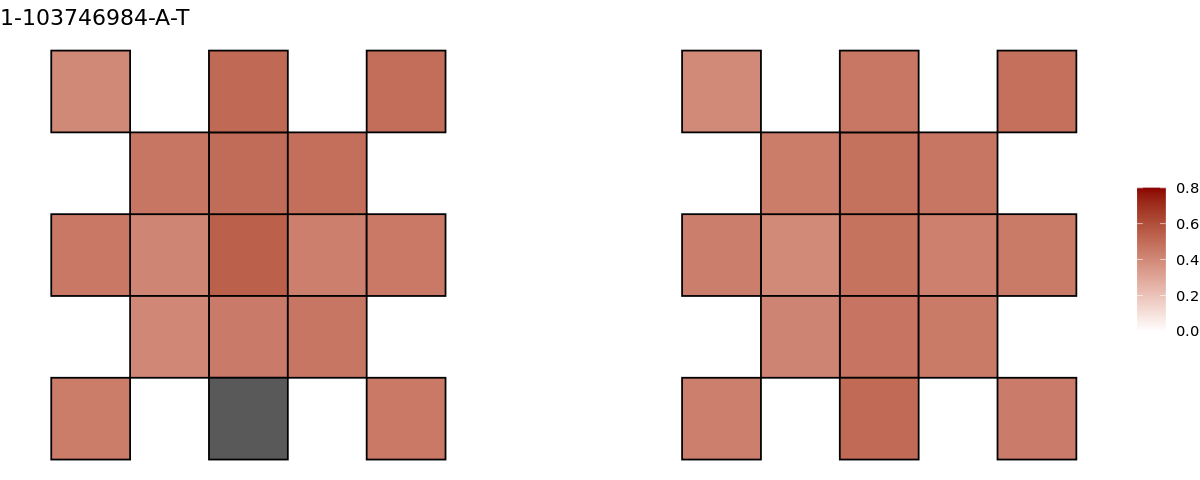

In [42]:
i <- 24
j<- -3
k <- 20
l <- -3
x <- 3
options(repr.plot.width=10, repr.plot.height=4)

ggplot() +  
#TBR1+ nuclei parietal lobe geoclone
geom_rect(aes(xmin = k, xmax = k+0.5, ymin = l, ymax = l+0.5, fill=casted_MAF_VarBySample2[x,]$'7669_R_P_1_TBR1'),color='black')+
geom_rect(aes(xmin = k+0.5, xmax = k+1, ymin = l, ymax = l+0.5, fill=casted_MAF_VarBySample2[x,]$'7669_R_P_3_TBR1'),color='black')+
geom_rect(aes(xmin = k+1, xmax = k+1.5, ymin = l, ymax = l+0.5, fill=casted_MAF_VarBySample2[x,]$'7669_R_P_13_TBR1'),color='black')+
geom_rect(aes(xmin = k-0.5, xmax = k, ymin = l, ymax = l+0.5, fill=casted_MAF_VarBySample2[x,]$'7669_R_P_2_TBR1'),color='black')+
geom_rect(aes(xmin = k-1, xmax = k-0.5, ymin = l, ymax = l+0.5, fill=casted_MAF_VarBySample2[x,]$'7669_R_P_15_TBR1'),color='black')+

geom_rect(aes(xmin = k, xmax = k+0.5, ymin = l+0.5, ymax = l+1, fill=casted_MAF_VarBySample2[x,]$'7669_R_P_5_TBR1'),color='black')+
geom_rect(aes(xmin = k, xmax = k+0.5, ymin = l+1, ymax = l+1.5, fill=casted_MAF_VarBySample2[x,]$'7669_R_P_11_TBR1'),color='black')+
geom_rect(aes(xmin = k, xmax = k+0.5, ymin = l-0.5, ymax = l, fill=casted_MAF_VarBySample2[x,]$'7669_R_P_4_TBR1'),color='black')+
geom_rect(aes(xmin = k, xmax = k+0.5, ymin = l-1, ymax = l-0.5, fill=casted_MAF_VarBySample2[x,]$''),color='black')+

geom_rect(aes(xmin = k+0.5, xmax = k+1, ymin = l+0.5, ymax = l+1, fill=casted_MAF_VarBySample2[x,]$'7669_R_P_8_TBR1'),color='black')+
geom_rect(aes(xmin = k+1, xmax = k+1.5, ymin = l+1, ymax = l+1.5, fill=casted_MAF_VarBySample2[x,]$'7669_R_P_12_TBR1'),color='black')+
geom_rect(aes(xmin = k-0.5, xmax = k, ymin = l-0.5, ymax = l, fill=casted_MAF_VarBySample2[x,]$'7669_R_P_7_TBR1'),color='black')+
geom_rect(aes(xmin = k-1, xmax = k-0.5, ymin = l-1, ymax = l-0.5, fill=casted_MAF_VarBySample2[x,]$'7669_R_P_17_TBR1'),color='black')+

geom_rect(aes(xmin = k-0.5, xmax = k, ymin = l+0.5, ymax = l+1, fill=casted_MAF_VarBySample2[x,]$'7669_R_P_9_TBR1'),color='black')+
geom_rect(aes(xmin = k-1, xmax = k-0.5, ymin = l+1, ymax = l+1.5, fill=casted_MAF_VarBySample2[x,]$'7669_R_P_16_TBR1'),color='black')+
geom_rect(aes(xmin = k+0.5, xmax = k+1, ymin = l-0.5, ymax = l, fill=casted_MAF_VarBySample2[x,]$'7669_R_P_6_TBR1'),color='black')+
geom_rect(aes(xmin = k+1, xmax = k+1.5, ymin = l-1, ymax = l-0.5, fill=casted_MAF_VarBySample2[x,]$'7669_R_P_14_TBR1'),color='black')+

#DLX1+ nuclei Parietal lobe geoclone
geom_rect(aes(xmin = i, xmax = i+0.5, ymin = j, ymax = j+0.5, fill=casted_MAF_VarBySample2[x,]$'7669_R_P_1_DLX1'),color='black')+
geom_rect(aes(xmin = i+0.5, xmax = i+1, ymin = j, ymax = j+0.5, fill=casted_MAF_VarBySample2[x,]$'7669_R_P_3_DLX1'),color='black')+
geom_rect(aes(xmin = i+1, xmax = i+1.5, ymin = j, ymax = j+0.5, fill=casted_MAF_VarBySample2[x,]$'7669_R_P_13_DLX1'),color='black')+
geom_rect(aes(xmin = i-0.5, xmax = i, ymin = j, ymax = j+0.5, fill=casted_MAF_VarBySample2[x,]$'7669_R_P_2_DLX1'),color='black')+
geom_rect(aes(xmin = i-1, xmax = i-0.5, ymin = j, ymax = j+0.5, fill=casted_MAF_VarBySample2[x,]$'7669_R_P_15_DLX1'),color='black')+

geom_rect(aes(xmin = i, xmax = i+0.5, ymin = j+0.5, ymax = j+1, fill=casted_MAF_VarBySample2[x,]$'7669_R_P_5_DLX1'),color='black')+
geom_rect(aes(xmin = i, xmax = i+0.5, ymin = j+1, ymax = j+1.5, fill=casted_MAF_VarBySample2[x,]$'7669_R_P_11_DLX1'),color='black')+
geom_rect(aes(xmin = i, xmax = i+0.5, ymin = j-0.5, ymax = j, fill=casted_MAF_VarBySample2[x,]$'7669_R_P_4_DLX1'),color='black')+
geom_rect(aes(xmin = i, xmax = i+0.5, ymin = j-1, ymax = j-0.5, fill=casted_MAF_VarBySample2[x,]$'7669_R_P_10_DLX1'),color='black')+

geom_rect(aes(xmin = i+0.5, xmax = i+1, ymin = j+0.5, ymax = j+1, fill=casted_MAF_VarBySample2[x,]$'7669_R_P_8_DLX1'),color='black')+
geom_rect(aes(xmin = i+1, xmax = i+1.5, ymin = j+1, ymax = j+1.5, fill=casted_MAF_VarBySample2[x,]$'7669_R_P_12_DLX1'),color='black')+
geom_rect(aes(xmin = i-0.5, xmax = i, ymin = j-0.5, ymax = j, fill=casted_MAF_VarBySample2[x,]$'7669_R_P_7_DLX1'),color='black')+
geom_rect(aes(xmin = i-1, xmax = i-0.5, ymin = j-1, ymax = j-0.5, fill=casted_MAF_VarBySample2[x,]$'7669_R_P_17_DLX1'),color='black')+

geom_rect(aes(xmin = i-0.5, xmax = i, ymin = j+0.5, ymax = j+1, fill=casted_MAF_VarBySample2[x,]$'7669_R_P_9_DLX1'),color='black')+
geom_rect(aes(xmin = i-1, xmax = i-0.5, ymin = j+1, ymax = j+1.5, fill=casted_MAF_VarBySample2[x,]$'7669_R_P_16_DLX1'),color='black')+
geom_rect(aes(xmin = i+0.5, xmax = i+1, ymin = j-0.5, ymax = j, fill=casted_MAF_VarBySample2[x,]$'7669_R_P_6_DLX1'),color='black')+
geom_rect(aes(xmin = i+1, xmax = i+1.5, ymin = j-1, ymax = j-0.5, fill=casted_MAF_VarBySample2[x,]$'7669_R_P_14_DLX1'),color='black')+

labs(title=rownames(casted_MAF_VarBySample2)[x],x="")+
#scale_fill_continuous(limits = c(0, 0.5))
scale_fill_gradient(low = "white", high = "red4", limits=c(0,0.8))+theme_void()+theme(legend.title=element_blank())
# figure <- ggarrange(plot,plot2, 
#                     labels = c("A", "B"),
#                     ncol = 2, nrow = 1)

#scale_color_gradientn(colours = c('grey90',RColorBrewer::brewer.pal(n = 6,name = 'YlOrRd')))

In [43]:
i <- 24
j<- -3
k <- 20
l <- -3

pdf(file="7669_Geoclone_Parietal_CTX.pdf",width=10,height=4)

for(x in 1:nrow(casted_MAF_VarBySample2)){

plot <-ggplot() +  
#TBR1+ nuclei parietal lobe geoclone
geom_rect(aes(xmin = k, xmax = k+0.5, ymin = l, ymax = l+0.5, fill=casted_MAF_VarBySample2[x,]$'7669_R_P_1_TBR1'),color='black')+
geom_rect(aes(xmin = k+0.5, xmax = k+1, ymin = l, ymax = l+0.5, fill=casted_MAF_VarBySample2[x,]$'7669_R_P_3_TBR1'),color='black')+
geom_rect(aes(xmin = k+1, xmax = k+1.5, ymin = l, ymax = l+0.5, fill=casted_MAF_VarBySample2[x,]$'7669_R_P_13_TBR1'),color='black')+
geom_rect(aes(xmin = k-0.5, xmax = k, ymin = l, ymax = l+0.5, fill=casted_MAF_VarBySample2[x,]$'7669_R_P_2_TBR1'),color='black')+
geom_rect(aes(xmin = k-1, xmax = k-0.5, ymin = l, ymax = l+0.5, fill=casted_MAF_VarBySample2[x,]$'7669_R_P_15_TBR1'),color='black')+

geom_rect(aes(xmin = k, xmax = k+0.5, ymin = l+0.5, ymax = l+1, fill=casted_MAF_VarBySample2[x,]$'7669_R_P_5_TBR1'),color='black')+
geom_rect(aes(xmin = k, xmax = k+0.5, ymin = l+1, ymax = l+1.5, fill=casted_MAF_VarBySample2[x,]$'7669_R_P_11_TBR1'),color='black')+
geom_rect(aes(xmin = k, xmax = k+0.5, ymin = l-0.5, ymax = l, fill=casted_MAF_VarBySample2[x,]$'7669_R_P_4_TBR1'),color='black')+
geom_rect(aes(xmin = k, xmax = k+0.5, ymin = l-1, ymax = l-0.5, fill=casted_MAF_VarBySample2[x,]$''),color='black')+

geom_rect(aes(xmin = k+0.5, xmax = k+1, ymin = l+0.5, ymax = l+1, fill=casted_MAF_VarBySample2[x,]$'7669_R_P_8_TBR1'),color='black')+
geom_rect(aes(xmin = k+1, xmax = k+1.5, ymin = l+1, ymax = l+1.5, fill=casted_MAF_VarBySample2[x,]$'7669_R_P_12_TBR1'),color='black')+
geom_rect(aes(xmin = k-0.5, xmax = k, ymin = l-0.5, ymax = l, fill=casted_MAF_VarBySample2[x,]$'7669_R_P_7_TBR1'),color='black')+
geom_rect(aes(xmin = k-1, xmax = k-0.5, ymin = l-1, ymax = l-0.5, fill=casted_MAF_VarBySample2[x,]$'7669_R_P_17_TBR1'),color='black')+

geom_rect(aes(xmin = k-0.5, xmax = k, ymin = l+0.5, ymax = l+1, fill=casted_MAF_VarBySample2[x,]$'7669_R_P_9_TBR1'),color='black')+
geom_rect(aes(xmin = k-1, xmax = k-0.5, ymin = l+1, ymax = l+1.5, fill=casted_MAF_VarBySample2[x,]$'7669_R_P_16_TBR1'),color='black')+
geom_rect(aes(xmin = k+0.5, xmax = k+1, ymin = l-0.5, ymax = l, fill=casted_MAF_VarBySample2[x,]$'7669_R_P_6_TBR1'),color='black')+
geom_rect(aes(xmin = k+1, xmax = k+1.5, ymin = l-1, ymax = l-0.5, fill=casted_MAF_VarBySample2[x,]$'7669_R_P_14_TBR1'),color='black')+

#DLX1+ nuclei Parietal lobe geoclone
geom_rect(aes(xmin = i, xmax = i+0.5, ymin = j, ymax = j+0.5, fill=casted_MAF_VarBySample2[x,]$'7669_R_P_1_DLX1'),color='black')+
geom_rect(aes(xmin = i+0.5, xmax = i+1, ymin = j, ymax = j+0.5, fill=casted_MAF_VarBySample2[x,]$'7669_R_P_3_DLX1'),color='black')+
geom_rect(aes(xmin = i+1, xmax = i+1.5, ymin = j, ymax = j+0.5, fill=casted_MAF_VarBySample2[x,]$'7669_R_P_13_DLX1'),color='black')+
geom_rect(aes(xmin = i-0.5, xmax = i, ymin = j, ymax = j+0.5, fill=casted_MAF_VarBySample2[x,]$'7669_R_P_2_DLX1'),color='black')+
geom_rect(aes(xmin = i-1, xmax = i-0.5, ymin = j, ymax = j+0.5, fill=casted_MAF_VarBySample2[x,]$'7669_R_P_15_DLX1'),color='black')+

geom_rect(aes(xmin = i, xmax = i+0.5, ymin = j+0.5, ymax = j+1, fill=casted_MAF_VarBySample2[x,]$'7669_R_P_5_DLX1'),color='black')+
geom_rect(aes(xmin = i, xmax = i+0.5, ymin = j+1, ymax = j+1.5, fill=casted_MAF_VarBySample2[x,]$'7669_R_P_11_DLX1'),color='black')+
geom_rect(aes(xmin = i, xmax = i+0.5, ymin = j-0.5, ymax = j, fill=casted_MAF_VarBySample2[x,]$'7669_R_P_4_DLX1'),color='black')+
geom_rect(aes(xmin = i, xmax = i+0.5, ymin = j-1, ymax = j-0.5, fill=casted_MAF_VarBySample2[x,]$'7669_R_P_10_DLX1'),color='black')+

geom_rect(aes(xmin = i+0.5, xmax = i+1, ymin = j+0.5, ymax = j+1, fill=casted_MAF_VarBySample2[x,]$'7669_R_P_8_DLX1'),color='black')+
geom_rect(aes(xmin = i+1, xmax = i+1.5, ymin = j+1, ymax = j+1.5, fill=casted_MAF_VarBySample2[x,]$'7669_R_P_12_DLX1'),color='black')+
geom_rect(aes(xmin = i-0.5, xmax = i, ymin = j-0.5, ymax = j, fill=casted_MAF_VarBySample2[x,]$'7669_R_P_7_DLX1'),color='black')+
geom_rect(aes(xmin = i-1, xmax = i-0.5, ymin = j-1, ymax = j-0.5, fill=casted_MAF_VarBySample2[x,]$'7669_R_P_17_DLX1'),color='black')+

geom_rect(aes(xmin = i-0.5, xmax = i, ymin = j+0.5, ymax = j+1, fill=casted_MAF_VarBySample2[x,]$'7669_R_P_9_DLX1'),color='black')+
geom_rect(aes(xmin = i-1, xmax = i-0.5, ymin = j+1, ymax = j+1.5, fill=casted_MAF_VarBySample2[x,]$'7669_R_P_16_DLX1'),color='black')+
geom_rect(aes(xmin = i+0.5, xmax = i+1, ymin = j-0.5, ymax = j, fill=casted_MAF_VarBySample2[x,]$'7669_R_P_6_DLX1'),color='black')+
geom_rect(aes(xmin = i+1, xmax = i+1.5, ymin = j-1, ymax = j-0.5, fill=casted_MAF_VarBySample2[x,]$'7669_R_P_14_DLX1'),color='black')+

labs(title=rownames(casted_MAF_VarBySample2)[x],x="")+
#scale_fill_continuous(limits = c(0, 0.5))
scale_fill_gradient(low = "white", high = "red4", limits=c(0,0.8))+theme_void()+theme(legend.title=element_blank())

print(plot)
    
}
dev.off()

png 
  2